In [1]:
import itertools

import pandas as pd
import numpy as np
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.genfromtxt('../Data/AFM/TXT/10-10-Z')

print (data.dtype)

float64


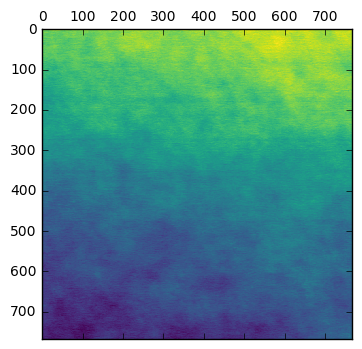

In [4]:
plt.matshow(data, cmap = 'viridis')

In [5]:
bkg = np.empty([768, 768])

print (bkg.dtype)

float64


In [33]:
def polynm_background(raw, n):
    """
    This function takes in a raw spectra as a .txt file and a user desired degree, n, of polynomial
    fitting. It returns the background data and the backgrounded data as np arrays
    """
    import warnings
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.modeling import models, fitting
    
    p_init = models.Polynomial2D(degree = n)
    fit_p = fitting.LevMarLSQFitter()
    
    x, y = raw.shape
    
    yy, xx = np.mgrid[0:x, 0:y]

    with warnings.catch_warnings():
        # Ignore model linearity warning from the fitter
        warnings.simplefilter('ignore')
        p = fit_p(p_init, xx, yy, data)
    
    bkg = p(xx, yy)
    final = data - bkg
    
    return bkg, final
    
    
    # Plot the data with the best-fit model
    plt.figure(figsize=(8, 2.5))
    plt.subplot(1, 3, 1)
    plt.imshow(data, origin='lower', interpolation='nearest', cmap = 'viridis')
    plt.title("Data")
    plt.subplot(1, 3, 2)
    plt.imshow(p(x, y), origin='lower', interpolation='nearest', cmap = 'viridis')
    plt.title("Model")
    plt.subplot(1, 3, 3)
    plt.imshow(data - p(x, y), origin='lower', interpolation='nearest', cmap = 'viridis')
    plt.title("Residual")

In [ ]:
#0th degree polynomial

# B(x,y) = a0

In [ ]:
#1st degree polynomial

# B(x,y) = a0 + a1x + a2y

In [ ]:
# 2nd degree polynomial

# B(x,y) = a0 + a1x + a2y + a3x^2 + a4xy + a5y^2

In [ ]:
# 3rd degree polynomial

# B(x,y) = a0 + a1x + a2y + a3x^2 + a4xy + a5y^2 + a6x^3 + a7x^2y + a8xy^2 + a9y^3

In [ ]:
# 4th degree polynomial

# B(x,y) = a0 + a1x + a2y + a3x^2 + a4xy + a5y^2 + a6x^3 + a7x^2y + a8xy^2 + a9y^3 + a10x^4 + a11x^3y + a12x^2y^2
#         + a13xy^3 + a14y^4

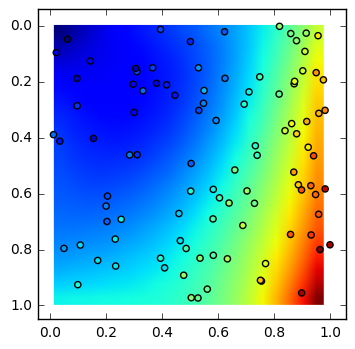

In [16]:
def main():
    # Generate Data...
    numdata = 100
    x = np.random.random(numdata)
    y = np.random.random(numdata)
    z = x**2 + y**2 + 3*x**3 + y + np.random.random(numdata)

    # Fit a 3rd order, 2d polynomial
    m = polyfit2d(x,y,z)

    # Evaluate it on a grid...
    nx, ny = 20, 20
    xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), nx), 
                         np.linspace(y.min(), y.max(), ny))
    zz = polyval2d(xx, yy, m)

    # Plot
    plt.imshow(zz, extent=(x.min(), y.max(), x.max(), y.min()))
    plt.scatter(x, y, c=z)
    plt.show()

def polyfit2d(x, y, z, order=3):
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
    for k, (i,j) in enumerate(ij):
        G[:,k] = x**i * y**j
    m, _, _, _ = np.linalg.lstsq(G, z)
    return m

def polyval2d(x, y, m):
    order = int(np.sqrt(len(m))) - 1
    ij = itertools.product(range(order+1), range(order+1))
    z = np.zeros_like(x)
    for a, (i,j) in zip(m, ij):
        z += a * x**i * y**j
    return z

main()

In [17]:
def polyfit2d2(x, y, f, deg):
    from numpy.polynomial import polynomial
    import numpy as np
    x = np.asarray(x)
    y = np.asarray(y)
    f = np.asarray(f)
    deg = np.asarray(deg)
    vander = polynomial.polyvander2d(x, y, deg)
    vander = vander.reshape((-1,vander.shape[-1]))
    f = f.reshape((vander.shape[0],))
    c = np.linalg.lstsq(vander, f)[0]
    return c.reshape(deg+1)

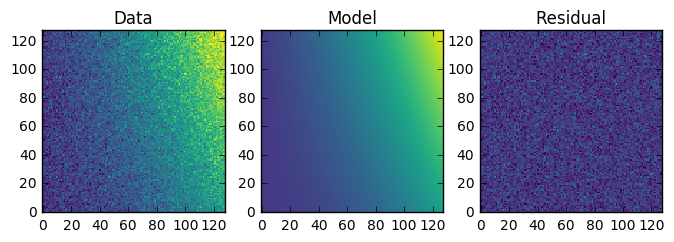

In [13]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)
y, x = np.mgrid[:128, :128]
z = 2. * x ** 2 - 0.5 * x ** 2 + 1.5 * x * y - 1.
z += np.random.normal(0., 0.1, z.shape) * 50000.

# Fit the data using astropy.modeling
p_init = models.Polynomial2D(degree=2)
fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, x, y, z)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', vmin=-1e4, vmax=5e4, cmap = 'viridis')
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4, cmap = 'viridis')
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x, y), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4, cmap = 'viridis')
plt.title("Residual")

In [25]:
y, x = np.mgrid[0:768, 0:768]

test1 = polyfit2d2(x, y, data, 3)

TypeError: iteration over a 0-d array

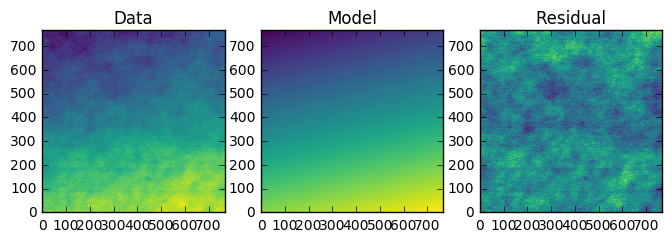

In [30]:
p_init = models.Polynomial2D(degree=1)
fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, x, y, data)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(data, origin='lower', interpolation='nearest', cmap = 'viridis')
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', cmap = 'viridis')
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(data - p(x, y), origin='lower', interpolation='nearest', cmap = 'viridis')
plt.title("Residual")

In [31]:
x, y = data.shape

In [32]:
print (x)
print (y)


768
768


In [34]:
test1, test2 = polynm_background(data, 3)

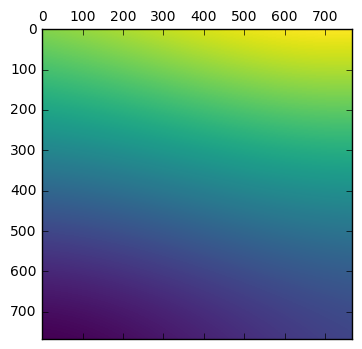

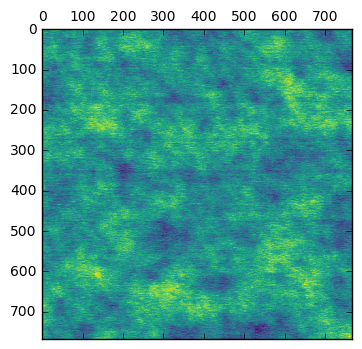

In [35]:
plt.matshow(test1, cmap = 'viridis')
plt.matshow(test2, cmap = 'viridis')